<a href="https://colab.research.google.com/github/amiguelnobrega/AQI/blob/main/aqi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Imports

In [1]:
# Import relevant libraries, packages, and modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [2]:
# Mount Google Drive in colab notebook

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Get .csv from gdrive

data = pd.read_csv('/content/gdrive/Othercomputers/My MacBook Air/Estudo/Google Advance DA/Projects/AQI/modified_c4_epa_air_quality.csv')
print('done!')

done!


#2. Data Exploration

In [6]:
# Display first 10 rows of the data.

data.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


The aqi_log column represents AQI readings that were pre-transformed logarithmically to suit the objectives of this project.

In [7]:
# Display number of rows, number of columns.

data.shape

(260, 8)

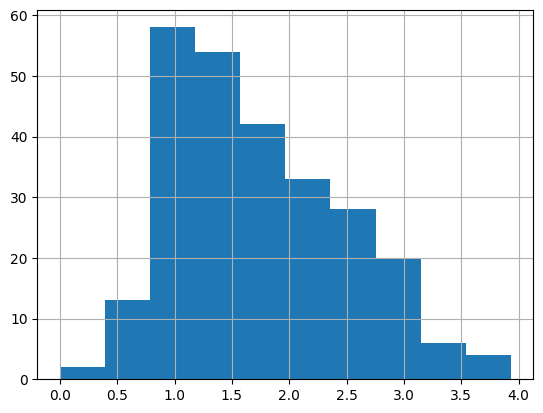

In [8]:
# Create a histogram to visualize distribution of aqi_log.

data["aqi_log"].hist();

#3. Statistical Tests

The empirical rule states that, for every normal distribution:
- 68% of the data fall within 1 standard deviation of the mean
- 95% of the data fall within 2 standard deviations of the mean
- 99.7% of the data fall within 3 standard deviations of the mean

In [9]:
# Define variable for aqi_log mean.

mean_aqi_log = data["aqi_log"].mean()

# Print out the mean.

print(mean_aqi_log)

1.7669210929985582


In [10]:
# Define variable for aqi_log standard deviation.

std_aqi_log = data["aqi_log"].std()

# Print out the standard deviation.

print(std_aqi_log)

0.7147155520223721


Now, to check the first part of the empirical rule: whether 68% of the aqi_log data falls within 1 standard deviation of the mean.

To compute the actual percentage of the data that satisfies this criteria, we define the lower limit (for example, 1 standard deviation below the mean) and the upper limit (for example, 1 standard deviation above the mean). This will enable to create a range and confirm whether each value falls within it.

In [11]:
# Define variable for lower limit, 1 standard deviation below the mean.

lower_limit = mean_aqi_log - 1 * std_aqi_log

# Define variable for upper limit, 1 standard deviation above the mean.

upper_limit = mean_aqi_log + 1 * std_aqi_log

# Display lower_limit, upper_limit.

print(lower_limit, upper_limit)

1.052205540976186 2.4816366450209304


In [12]:
# Display the actual percentage of data that falls within 1 standard deviation of the mean.

((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

76.15384615384615

In [13]:
# Define variable for lower limit, 2 standard deviations below the mean.

lower_limit = mean_aqi_log - 2 * std_aqi_log

# Define variable for upper limit, 2 standard deviations below the mean.

upper_limit = mean_aqi_log + 2 * std_aqi_log

# Display lower_limit, upper_limit.

print(lower_limit, upper_limit)

0.3374899889538139 3.1963521970433026


In [14]:
# Display the actual percentage of data that falls within 2 standard deviations of the mean.

((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

95.76923076923077

Now, we consider the third part of the empirical rule:whether 99.7% of the aqi_log data falls within 3 standard deviations of the mean.

To compute the actual percentage of the data that satisfies this criteria, we define the lower limit (for example, 3 standard deviations below the mean) and the upper limit (for example, 3 standard deviations above the mean). This will enable to create a range and confirm whether each value falls within it.

In [15]:
# Define variable for lower limit, 3 standard deviations below the mean.

lower_limit = mean_aqi_log - 3 * std_aqi_log

# Define variable for upper limit, 3 standard deviations above the mean.

upper_limit = mean_aqi_log + 3 * std_aqi_log

# Display lower_limit, upper_limit.

print(lower_limit, upper_limit)

-0.37722556306855815 3.9110677490656744


In [16]:
# Display the actual percentage of data that falls within 3 standard deviations of the mean.

((data["aqi_log"] >= lower_limit) & (data["aqi_log"] <= upper_limit)).mean() * 100

99.61538461538461

#4. Results and Evaluation

The 95.77% is very close to 95%, and the 99.62% is very close to 99.7%. The 76.15% is not as close to 68%, but relatively close. Overall, from applying the empirical rule, the data appears to be not exactly normal, but could be considered approximately normal.

Since z-score indicates the relative position of values (for instance, z-score measures how many standard deviations below or above the mean a data point is), it can be used to detect outliers.

Z-score could be used to identify values that lie more than 3 standard deviations below or above the mean. These values may be considered outliers.

In [17]:
# Compute the z-score for every aqi_log value, and add a column named z_score in the data to store those results.

data["z_score"] = stats.zscore(data["aqi_log"], ddof=1) # ddof=degrees of freedom correction (sample vs. population)

# Display the first 5 rows to ensure that the new column was added.

data.head()

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.437265
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034753
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.935070
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.532557
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.532557


In [18]:
# Display data where `aqi_log` is above or below 3 standard deviations of the mean

data[(data["z_score"] > 3) | (data["z_score"] < -3)]

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z_score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.029044


### Conclusion

The aqi_log for West Phoenix is slightly above 3 standard deviations of the mean. This means that the air quality at that site is worse than the rest of the sites represented in the data.

Detecting outliers is important because they can reveal two important things, depending on the context: First, they can identify measurements that were taken incorrectly. Second, they can highlight parts of the data that can be focused on to make improvements.

For example, if the aqi_log for West Phoenix is considered an outlier, then that site can be studied further to determine what practices or changes might improve the air quality.